<a href="https://colab.research.google.com/github/lbhargav/Convolutional-Neural-Networks/blob/master/mnist_cnn_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MNIST Handwritten Digit Recognition Using CNN**

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

Training set: 60,000 pictures (64 by 64 pixels) of signs representing numbers from 0 to 9.

Test set: 10,000 pictures (64 by 64 pixels) of signs representing numbers from 0 to 9. 



**Exploring the Tensorflow Library¶**

To start, you will import the library:

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd

%matplotlib inline


In [0]:
# Loading the dataset
train_data = pd.read_csv(r'D:\\train.csv')
test_data = pd.read_csv("MNIST Digit Dataset/test.csv")
train_data.head()

y = 1


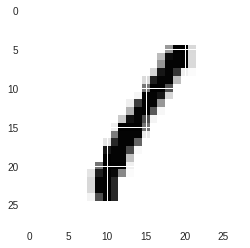

In [0]:
# Example of a picture
index = 3
plt.imshow(X_train[index])
print ("y = " + str(np.squeeze(Y_train[index])))

In [0]:
# Normalize image vectors
X_train = X_train/255.
X_test = X_test/255.

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [0]:
# Further break training data into train / validation sets
(X_train, X_valid) = X_train[5000:], X_train[:5000] 
(Y_train, Y_valid) = Y_train[5000:], Y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_valid = X_valid.reshape(X_valid.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

# One-hot encode the labels
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)
Y_valid = keras.utils.to_categorical(Y_valid, 10)

# Print training set shape
print("X_train shape:", X_train.shape, "Y_train shape:", Y_train.shape)

# Print the number of training, validation, and test datasets
print(X_train.shape[0], 'train set')
print(X_valid.shape[0], 'validation set')
print(X_test.shape[0], 'test set')

X_train shape: (55000, 28, 28, 1) Y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


**Building a model.**

To train and test this model:

Create a model Compile the model by calling model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])

Train the model on train data by calling model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)

Test the model on test data by calling model.evaluate(x = ..., y = ...)

In [0]:
# building the model

model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network

# layer 1
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

# layer 2
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

# fully connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

# getting the class label prediction with softmax 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train,
         batch_size=512,
         epochs=10,
         validation_data=(X_valid, Y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 61s 1ms/step - loss: 0.0563 - acc: 0.9823 - val_loss: 0.0303 - val_acc: 0.9906
Epoch 2/10
55000/55000 [==============================] - 62s 1ms/step - loss: 0.0511 - acc: 0.9839 - val_loss: 0.0300 - val_acc: 0.9906
Epoch 3/10
55000/55000 [==============================] - 61s 1ms/step - loss: 0.0542 - acc: 0.9827 - val_loss: 0.0285 - val_acc: 0.9908
Epoch 4/10
55000/55000 [==============================] - 61s 1ms/step - loss: 0.0497 - acc: 0.9848 - val_loss: 0.0286 - val_acc: 0.9910
Epoch 5/10
55000/55000 [==============================] - 61s 1ms/step - loss: 0.0498 - acc: 0.9846 - val_loss: 0.0286 - val_acc: 0.9910
Epoch 6/10
55000/55000 [==============================] - 61s 1ms/step - loss: 0.0505 - acc: 0.9846 - val_loss: 0.0284 - val_acc: 0.9902
Epoch 7/10
55000/55000 [==============================] - 61s 1ms/step - loss: 0.0517 - acc: 0.9842 - val_loss: 0.0283 - val_acc:

In [0]:
# Evaluate the model on test set
score_train = model.evaluate(X_train, Y_train, verbose=0)
score_test = model.evaluate(X_test, Y_test, verbose=0)

# Print test accuracy
print('\n', 'Training  accuracy:', score_train[1])
print('\n', 'Test accuracy:', score_test[1])


 Training  accuracy: 0.9962727272727273

 Test accuracy: 0.9918
